In [22]:
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
from mpl_toolkits import mplot3d
import missingno as mn
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [34]:
# Read the data frame
df = pd.read_csv(r"C:\Users\LALIT YADAV\Downloads\loans_full_schema.csv", delimiter=',')
df.head(10)

emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE        90000.0   
1   warehouse office clerk        10.0    HI          RENT        40000.0   
2                 assembly         3.0    WI          RENT        40000.0   
3         customer service         1.0    PA          RENT        30000.0   
4     security supervisor         10.0    CA          RENT        35000.0   
5                      NaN         NaN    KY           OWN        34000.0   
6                      hr         10.0    MI      MORTGAGE        35000.0   
7                   police        10.0    AZ      MORTGAGE       110000.0   
8                    parts        10.0    NV      MORTGAGE        65000.0   
9               4th person         3.0    IL          RENT        30000.0   

   verified_income  debt_to_income  annual_income_joint  \
0         Verified           18.01                  NaN   
1     Not Verified            5.04                  NaN   
2  Source Verified           21.15                  NaN   
3     Not Verified           10.16                  NaN   
4         Verified           57.96              57000.0   
5     Not Verified            6.46                  NaN   
6  Source Verified           23.66             155000.0   
7  Source Verified           16.19                  NaN   
8  Source Verified           36.48                  NaN   
9     Not Verified           18.91                  NaN   

  verification_income_joint  debt_to_income_joint  delinq_2y  \
0                       NaN                   NaN          0   
1                       NaN                   NaN          0   
2                       NaN                   NaN          0   
3                       NaN                   NaN          0   
4                  Verified                 37.66          0   
5                       NaN                   NaN          1   
6              Not Verified                 13.12          0   
7                       NaN                   NaN          1   
8                       NaN                   NaN          1   
9                       NaN                   NaN          0   

   months_since_last_delinq  earliest_credit_line  inquiries_last_12m  \
0                      38.0                  2001                   6   
1                       NaN                  1996                   1   
2                      28.0                  2006                   4   
3                       NaN                  2007                   0   
4                       NaN                  2008                   7   
5                       3.0                  1990                   6   
6                       NaN                  2004                   1   
7                      19.0                  2005                   1   
8                      18.0                  1998                   3   
9                       NaN                  2001                   0   

   total_credit_lines  open_credit_lines  total_credit_limit  \
0                  28                 10               70795   
1                  30                 14               28800   
2                  31                 10               24193   
3                   4                  4               25400   
4                  22                 16               69839   
5                  32                 12               42100   
6                  12                 10              291852   
7                  30                 15              342336   
8                  35                 21              283190   
9                   9                  6               33114   

   total_credit_utilized  num_collections_last_12m  \
0                  38767                         0   
1                   4321                         0   
2                  16000                         0   
3                   4997                         0   
4                  52722           

In [3]:
print("The shape of the Training Dataset is:",df.shape)

The shape of the Training Dataset is: (10000, 55)


In [4]:
print("The Dimensions of the Training Dataset is:",df.ndim)

The Dimensions of the Training Dataset is: 2


In [5]:
print("Column names in the Training Dataset are:\n",df.columns)

Column names in the Training Dataset are:
 Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_

In [6]:
#check for unique values
df.nunique()

emp_title                           4741
emp_length                            11
state                                 50
homeownership                          3
annual_income                       1463
verified_income                        3
debt_to_income                      3673
annual_income_joint                  596
verification_income_joint              3
debt_to_income_joint                1189
delinq_2y                             12
months_since_last_delinq              97
earliest_credit_line                  53
inquiries_last_12m                    26
total_credit_lines                    78
open_credit_lines                     45
total_credit_limit                  9119
total_credit_utilized               9497
num_collections_last_12m               4
num_historical_failed_to_pay           9
months_since_90d_late                106
current_accounts_delinq                2
total_collection_amount_ever         896
current_installment_accounts          30
accounts_opened_

As there is no unique id or primary key to identify each row, inserting row number as id assuming that each row represents one unqiue person

In [7]:
df['Id']=df.index

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [9]:
df.describe()

emp_length  annual_income  debt_to_income  annual_income_joint  \
count  9183.000000   1.000000e+04     9976.000000         1.495000e+03   
mean      5.930306   7.922215e+04       19.308192         1.279146e+05   
std       3.703734   6.473429e+04       15.004851         7.016838e+04   
min       0.000000   0.000000e+00        0.000000         1.920000e+04   
25%       2.000000   4.500000e+04       11.057500         8.683350e+04   
50%       6.000000   6.500000e+04       17.570000         1.130000e+05   
75%      10.000000   9.500000e+04       25.002500         1.515455e+05   
max      10.000000   2.300000e+06      469.090000         1.100000e+06   

       debt_to_income_joint    delinq_2y  months_since_last_delinq  \
count           1495.000000  10000.00000               4342.000000   
mean              19.979304      0.21600                 36.760709   
std                8.054781      0.68366                 21.634939   
min                0.320000      0.00000                  1.000000   
25%               14.160000      0.00000                 19.000000   
50%               19.720000      0.00000                 34.000000   
75%               25.500000      0.00000                 53.000000   
max               39.980000     13.00000                118.000000   

       earliest_credit_line  inquiries_last_12m  total_credit_lines  \
count           10000.00000         10000.00000        10000.000000   
mean             2001.29000             1.95820           22.679600   
std                 7.79551             2.38013           11.885439   
min              1963.00000             0.00000            2.000000   
25%              1997.00000             0.00000           14.000000   
50%              2003.00000             1.00000           21.000000   
75%              2006.00000             3.00000           29.000000   
max              2015.00000            29.00000           87.000000   

       open_credit_lines  total_credit_limit  total_credit_utilized  \
count        10000.00000        1.000000e+04           10000.000000   
mean            11.40440        1.836062e+05           51049.063100   
std              5.86828        1.876327e+05           53636.731172   
min              0.00000        0.000000e+00               0.000000   
25%              7.00000        5.159375e+04           19185.500000   
50%             10.00000        1.146670e+05           36927.000000   
75%             14.00000        2.675500e+05           65421.000000   
max             51.00000        3.386034e+06          942456.000000   

       num_collections_last_12m  num_historical_failed_to_pay  \
count              10000.000000                  10000.000000   
mean                   0.013800                      0.167100   
std                    0.126535                      0.687768   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      0.000000   
75%                    0.000000                      0.000000   
max                    3.000000                     52.000000   

       months_since_90d_late  current_accounts_delinq  \
count            2285.000000               10000.0000   
mean               46.112473                   0.0001   
std                21.748021                   0.0100   
min                 2.000000                   0.0000   
25%                29.000000                   0.0000   
50%                47.000000                   0.0000   
75%                63.000000                   0.0000   
max               128.000000                   1.0000   

       total_collection_amount_ever  current_installment_accounts  \
count                  10000.000000                  10000.000000   
mean                     184.334000                      2.663600   
std                     2206.389859                      2.935387   
min                        0.000000                   

<AxesSubplot:>

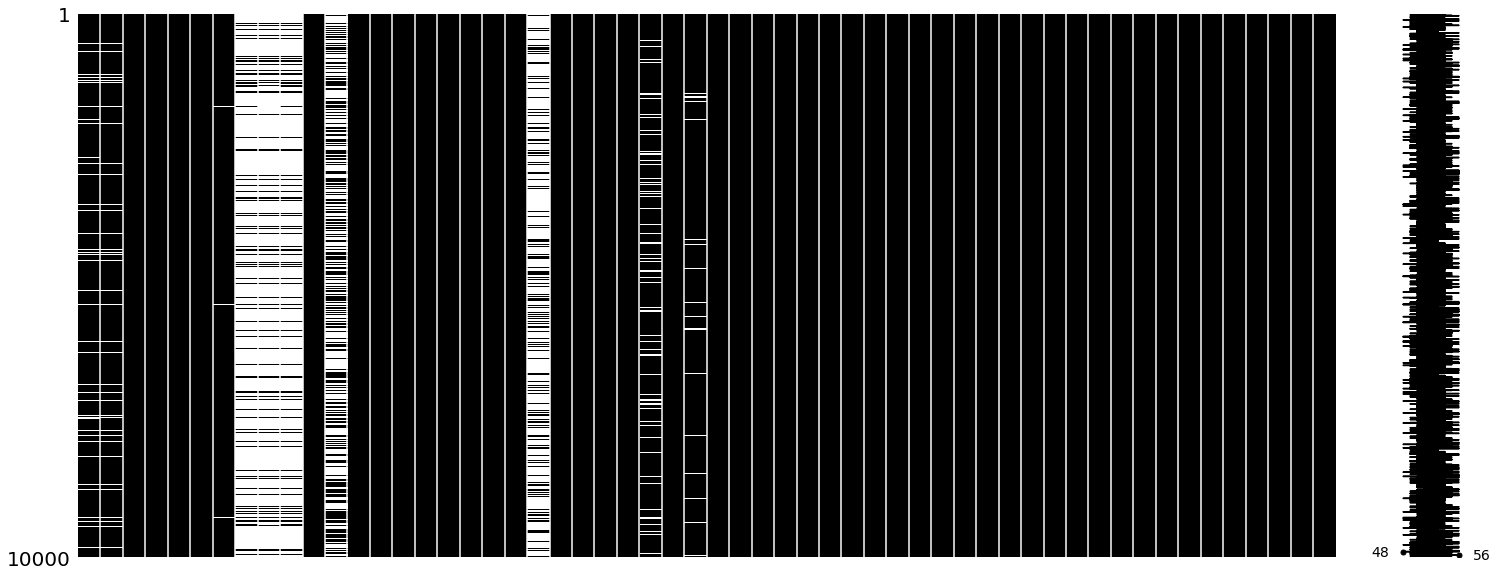

In [10]:
#Visualizing the missing values
mn.matrix(df,color=(0,0,0))

In [355]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),'% missing values.\n')

emp_title 0.0833 % missing values.

emp_length 0.0817 % missing values.

debt_to_income 0.0024 % missing values.

annual_income_joint 0.8505 % missing values.

verification_income_joint 0.8545 % missing values.

debt_to_income_joint 0.8505 % missing values.

months_since_last_delinq 0.5658 % missing values.

months_since_90d_late 0.7715 % missing values.

months_since_last_credit_inquiry 0.1271 % missing values.

num_accounts_120d_past_due 0.0318 % missing values.



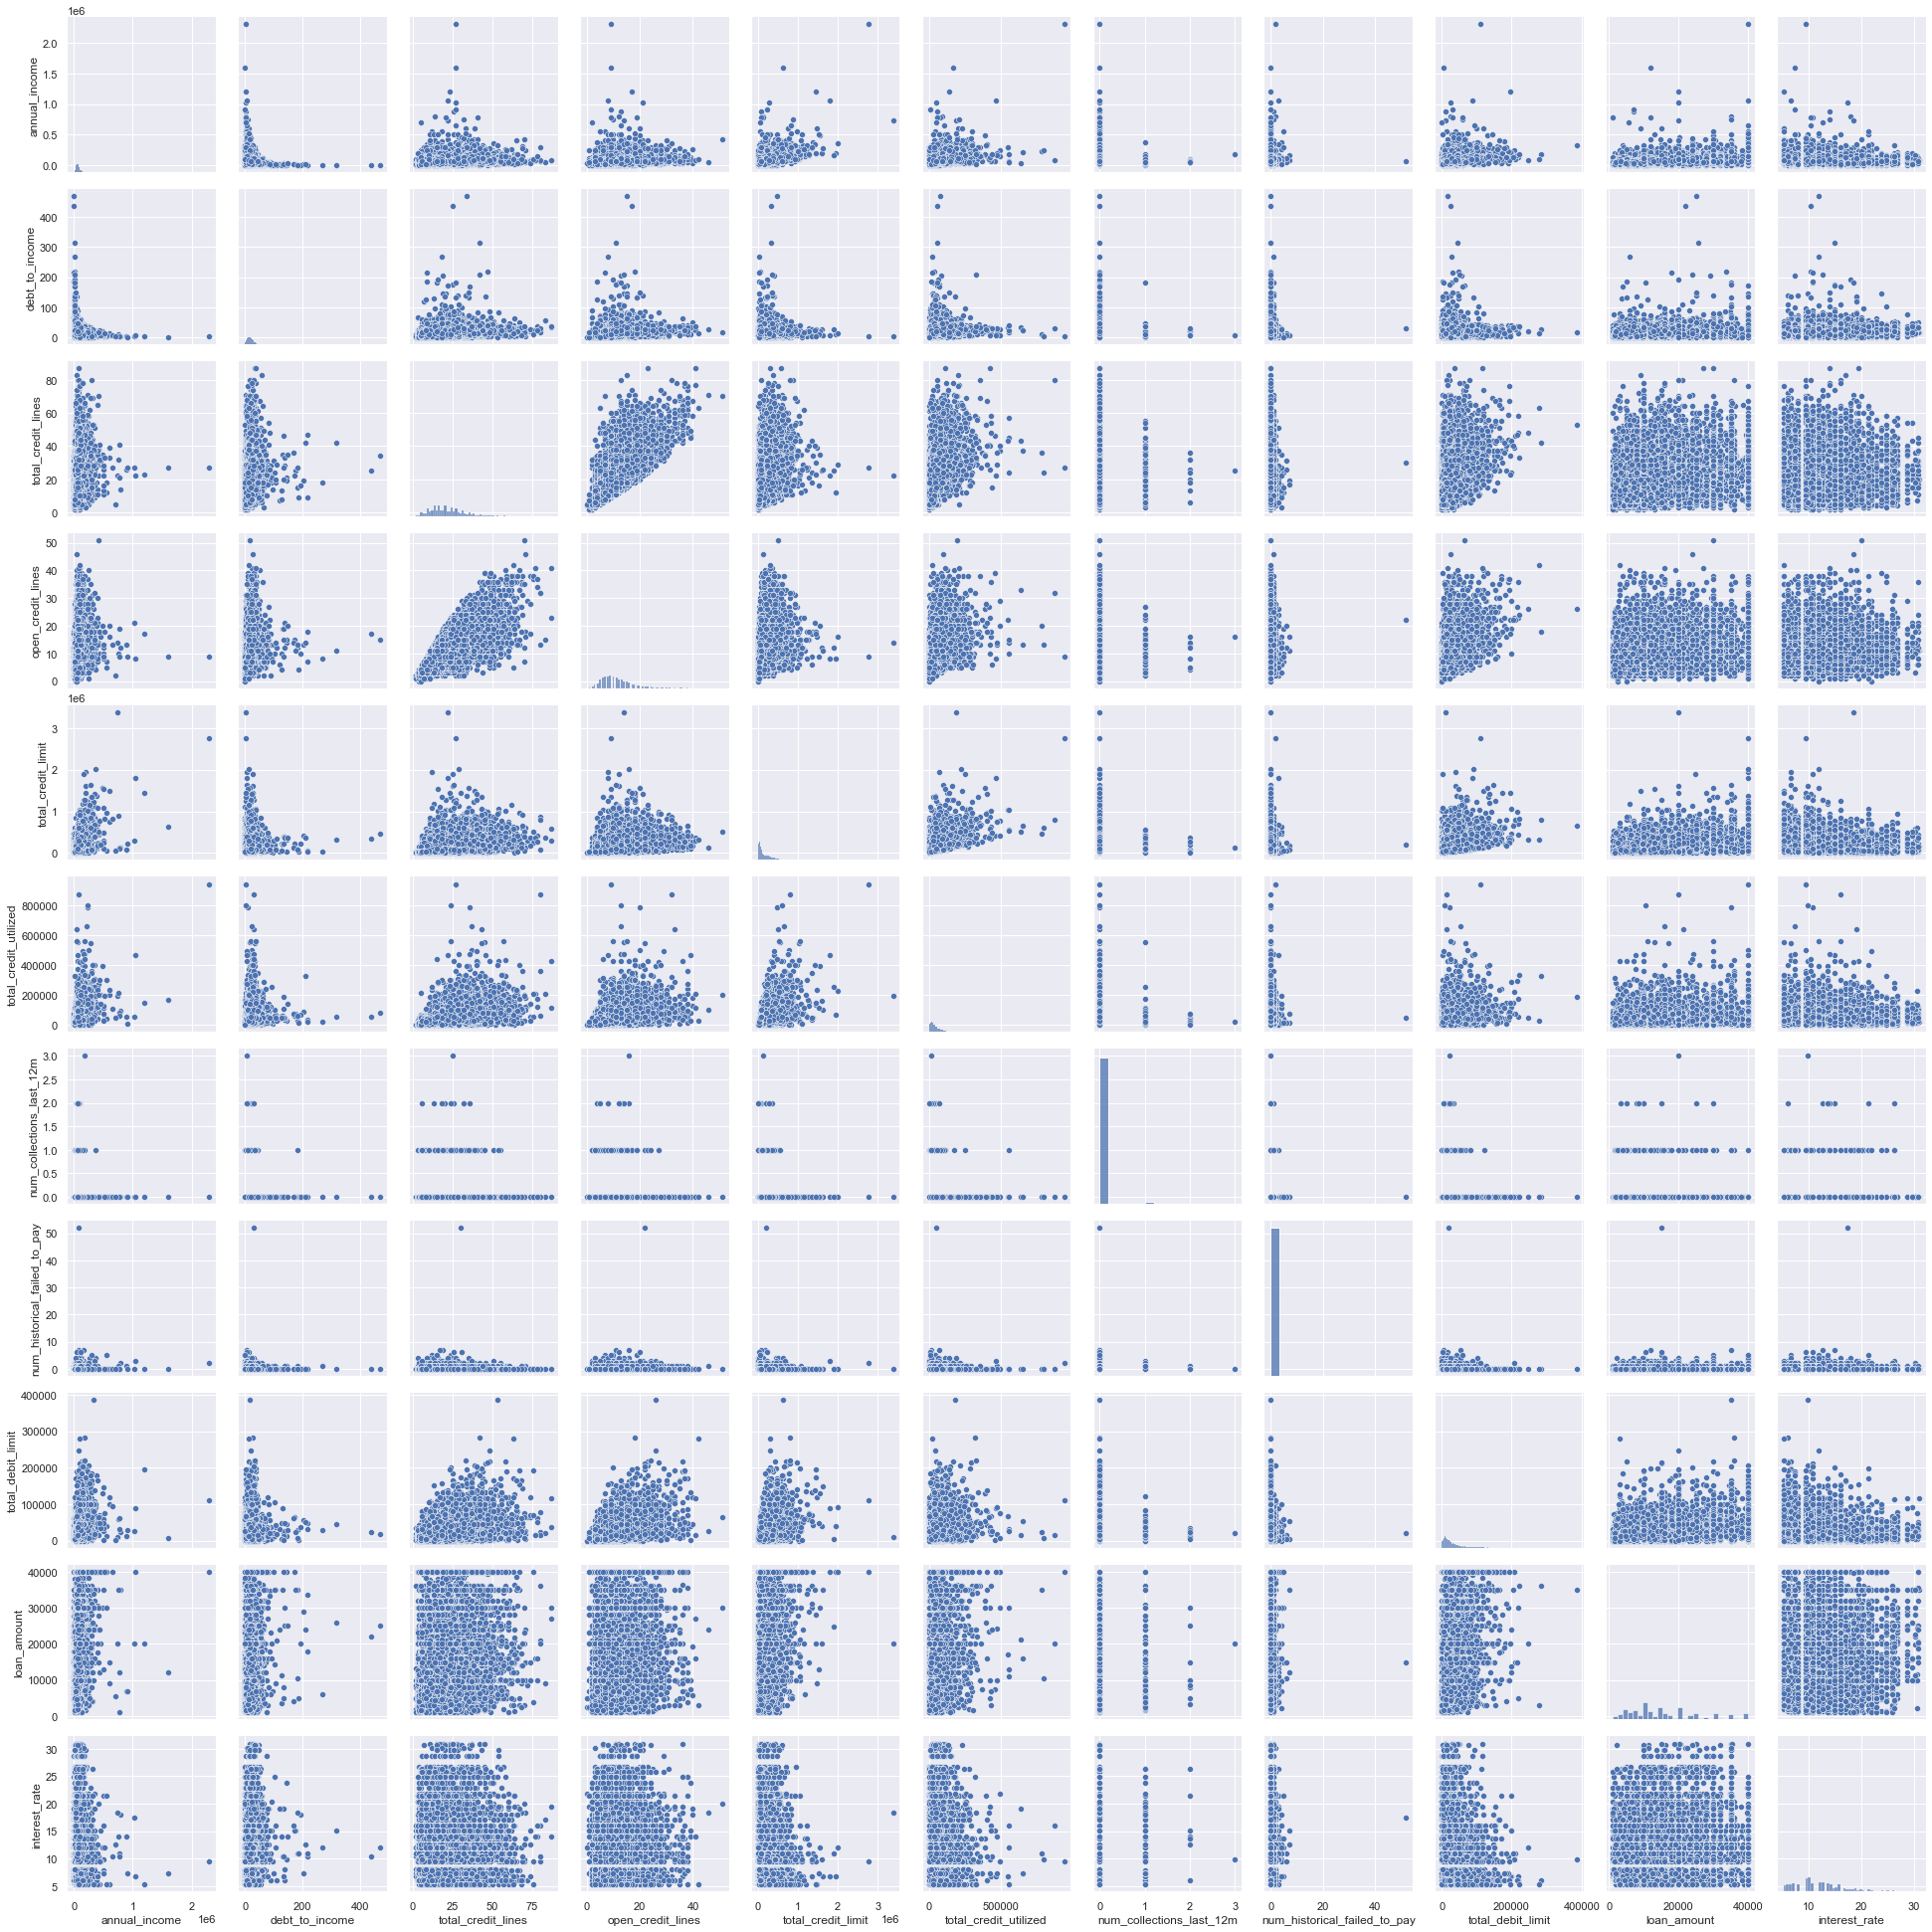

In [14]:
#scatterplot
sns.set()
cols = ['annual_income','verified_income', 'debt_to_income','total_credit_lines', 'open_credit_lines','total_credit_limit',
        'total_credit_utilized','num_collections_last_12m', 'num_historical_failed_to_pay','total_debit_limit','loan_amount',
        'interest_rate']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [77]:
fig = px.scatter(df, x="open_credit_lines", y="total_credit_lines", color="application_type")
fig.show()

<h1 style="font-size:1.2em;color:Red">Open credit lines and total credit lines are highly related to each other for both individual and joint application types</h1>

In [47]:
bar = df.groupby(["application_type","loan_purpose"])['loan_amount'].sum().reset_index()
bar.columns = ["application_type","loan_purpose",'loan_amount']
px.bar(data_frame=bar, x = 'loan_purpose', y = 'loan_amount',color="application_type",title="Loan Amount by Loan Type, Application Type")

<h1 style="font-size:1.2em;color:Red">The loan amount due to debt_consolidation is highest among other type for the individual application as compared to joint.</h1>

In [63]:
bar = df.groupby(["state"])['loan_amount'].sum().reset_index()
bar=bar.sort_values("loan_amount")
bar.columns = ["state",'loan_amount']
px.bar(data_frame=bar, x = 'loan_amount', y = 'state',title="Loan Amount by Loan Type, Application Type",width=800, height=1000)

<h1 style="font-size:1.2em;color:Red">Total loan amount for Califonia State is highest and lowest North Dakota.</h1>

In [76]:
p=df.groupby(['homeownership'])['loan_amount'].sum().reset_index()
fig = px.pie(p, values='loan_amount', names='homeownership',title="Loan Amount by Homeownership")
fig.show()

<h1 style="font-size:1.2em;color:Red">People with mortgage homes have the highest loan amount</h1>

In [82]:
d=df.groupby(['loan_status'])['total_credit_lines'].sum().reset_index()
fig = px.pie(d, values='total_credit_lines', names='loan_status',title="total_credit_lines by loan_status")
fig.show()

<h1 style="font-size:1.2em;color:Red">93% of the credit lines are in current status</h1>

In [357]:
print("Id of Person {}".format(len(df.Id)))

Id of Person 10000


In [95]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print('\n')
# visualise the numerical variables........
df[numerical_features].head().style.set_properties(**{"background-color": "#98FB98","color": "black", "border-color": "black"})

Number of numerical variables:  43




In [121]:
#Basic statistic on saleprice..
df['interest_rate'].describe()

count    10000.000000
mean        12.427524
std          5.001105
min          5.310000
25%          9.430000
50%         11.980000
75%         15.050000
max         30.940000
Name: interest_rate, dtype: float64

Categorical Variables:-

In [125]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['emp_title',
 'state',
 'homeownership',
 'verified_income',
 'verification_income_joint',
 'loan_purpose',
 'application_type',
 'grade',
 'sub_grade',
 'issue_month',
 'loan_status',
 'initial_listing_status',
 'disbursement_method']

In [128]:
# Check number of categories
for feature in categorical_features:
    print('The feature is {} and number of categories are {}.'.format(feature,len(df[feature].unique())))
    print('\n')

The feature is emp_title and number of categories are 4742.


The feature is state and number of categories are 50.


The feature is homeownership and number of categories are 3.


The feature is verified_income and number of categories are 3.


The feature is verification_income_joint and number of categories are 4.


The feature is loan_purpose and number of categories are 12.


The feature is application_type and number of categories are 2.


The feature is grade and number of categories are 7.


The feature is sub_grade and number of categories are 32.


The feature is issue_month and number of categories are 3.


The feature is loan_status and number of categories are 6.


The feature is initial_listing_status and number of categories are 2.


The feature is disbursement_method and number of categories are 2.




Find out the relationship between categorical variable and dependent feature SalesPrice:-

Let's Find The Missing values:-

In [134]:
#PERCENTAGE OF THE MISSING VALUES IN THE DATAFRAME..
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    Dtypes =df.dtypes
    return pd.concat([total, Percentage,Dtypes], axis=1, keys=['Total', 'Percentage','Dtypes'])
missing_data(df).style.set_properties(**{"background-color": "#98FB98","color": "black", "border-color": "black"})

Dropping columns with more than 70% missing values:-

In [136]:
df = df.drop(['verification_income_joint','debt_to_income_joint','annual_income_joint',
         'months_since_90d_late'], axis=1)

Fill the missing values:-

In [137]:
# Dealing with Numerical missing values
df['months_since_last_delinq']=df['months_since_last_delinq'].fillna(df['months_since_last_delinq'].median())
df['months_since_last_credit_inquiry']=df['months_since_last_credit_inquiry'].fillna(df['months_since_last_credit_inquiry'].median())
df['emp_length']=df['emp_length'].fillna(df['emp_length'].median())
df['num_accounts_120d_past_due']=df['num_accounts_120d_past_due'].fillna(df['num_accounts_120d_past_due'].median())
df['debt_to_income']=df['debt_to_income'].fillna(df['debt_to_income'].median())

In [138]:
#Dealing with categorical Missing values
df['emp_title']=df['emp_title'].fillna(df['emp_title'].mode()[0])

In [139]:
#PERCENTAGE OF THE MISSING VALUES IN THE DATAFRAME..
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    Dtypes =df.dtypes
    return pd.concat([total, Percentage,Dtypes], axis=1, keys=['Total', 'Percentage','Dtypes'])
missing_data(df)

In [141]:
df.head(10)

Correlation of Data Set

<AxesSubplot:>

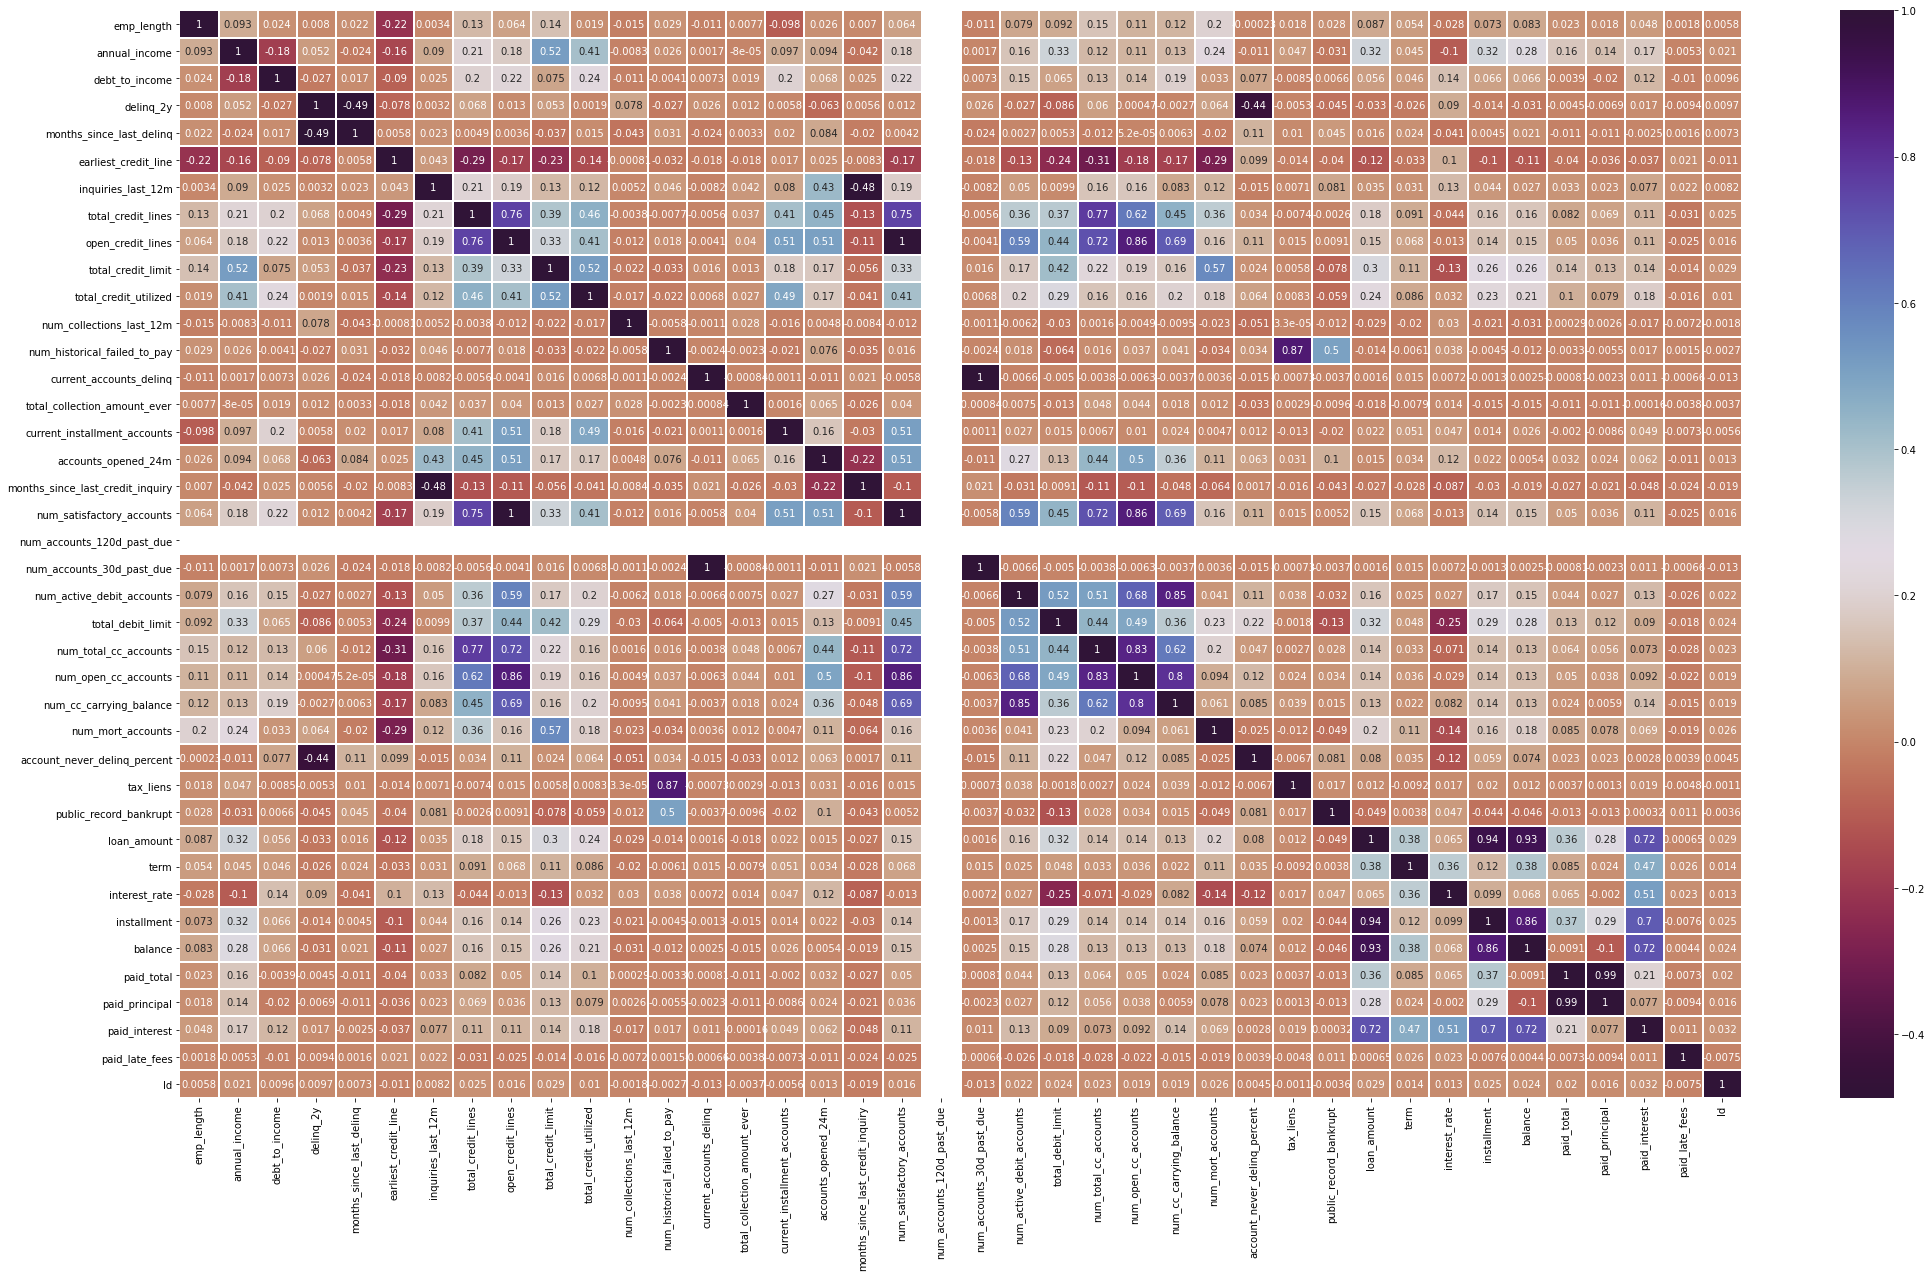

In [142]:
import seaborn as sns
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True,cmap="twilight_shifted_r",linewidth = 1,linecolor = "white")

Encoding Categorical Variables:-

In [147]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [149]:
df.head()

In [151]:
print("The shape of the Training Dataset is:",df.shape)

The shape of the Training Dataset is: (10000, 52)


In [155]:
#Now creating dummies
df=pd.get_dummies(df, columns=['emp_title',
 'state',
 'homeownership',
 'verified_income',
 'loan_purpose',
 'application_type',
 'grade',
 'sub_grade',
 'issue_month',
 'loan_status',
 'initial_listing_status',
 'disbursement_method'],drop_first=True)

In [343]:
df.head()

emp_length  annual_income  debt_to_income  delinq_2y  \
0           3           1061            1614          0   
1          10            403             371          0   
2           3            403            1920          0   
3           1            227             847          0   
4          10            316            3568          0   

   months_since_last_delinq  earliest_credit_line  inquiries_last_12m  \
0                        37                    38                   6   
1                        33                    33                   1   
2                        27                    43                   4   
3                        33                    44                   0   
4                        33                    45                   7   

   total_credit_lines  open_credit_lines  total_credit_limit  \
0                  26                 10                2756   
1                  28                 14                 638   
2                  29                 10                 462   
3                   2                  4                 505   
4                  20                 16                2712   

   total_credit_utilized  num_collections_last_12m  \
0                   4873                         0   
1                    411                         0   
2                   1866                         0   
3                    489                         0   
4                   6218                         0   

   num_historical_failed_to_pay  current_accounts_delinq  \
0                             0                        0   
1                             1                        0   
2                             0                        0   
3                             1                        0   
4                             0                        0   

   total_collection_amount_ever  current_installment_accounts  \
0                           587                             2   
1                             0                             0   
2                           292                             1   
3                             0                             1   
4                             0                             1   

   accounts_opened_24m  months_since_last_credit_inquiry  \
0                    5                                 5   
1                   11                                 8   
2                   13                                 7   
3                    1                                15   
4                    6                                 4   

   num_satisfactory_accounts  num_accounts_120d_past_due  \
0                         10                           0   
1                         14                           0   
2                         10                           0   
3                          4                           0   
4                         16                           0   

   num_accounts_30d_past_due  num_active_debit_accounts  total_debit_limit  \
0                          0                          2                132   
1                          0                          3                200   
2                          0                          3                 47   
3                          0                          2                231   
4                          0                         10                388   

   num_total_cc_accounts  num_open_cc_accounts  num_cc_carrying_balance  \
0                     12                     8                        6   
1                     22                    14                        4   
2                     12                     8                        6   
3                      1                     3                        2   
4                     18                    15                       13   

   num_mort_accounts  account_never_delinq_percent  tax_liens  \
0                  1                    

In [161]:
print("Column names in the Final Dataset are:\n",df.columns)

Column names in the Final Dataset are:
 Index(['emp_length', 'annual_income', 'debt_to_income', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit',
       ...
       'sub_grade_31', 'issue_month_1', 'issue_month_2', 'loan_status_1',
       'loan_status_2', 'loan_status_3', 'loan_status_4', 'loan_status_5',
       'initial_listing_status_1', 'disbursement_method_1'],
      dtype='object', length=4891)


In [162]:
#PERCENTAGE OF THE MISSING VALUES IN THE DATAFRAME..
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    Dtypes =df.dtypes
    return pd.concat([total,Percentage,Dtypes], axis=1, keys=['Total','Percentage','Dtypes'])
missing_data(df).style.set_properties(**{"background-color": "#98FB98","color": "black", "border-color": "black"})

In [164]:
df.shape

(10000, 4891)

In [215]:
X=df.drop(['interest_rate'],axis=1)
y=df['interest_rate']

In [216]:
X.shape

(10000, 4890)

In [217]:
y.shape

(10000,)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [222]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(len(explained_variance))

[4.00238875e-01 2.12149484e-01 2.05542870e-01 8.16175210e-02
 5.93572057e-02 1.99798343e-02 1.36128261e-02 2.43615642e-03
 1.85584168e-03 1.41264094e-03 1.07431052e-03 5.95435976e-04
 7.62310212e-05 3.71777493e-05 5.12926845e-06 4.22280161e-06
 1.34982237e-06 7.97262227e-07 6.94457648e-07 4.16961539e-07
 2.76841318e-07 1.76135065e-07 1.45795579e-07 7.62048826e-08
 6.78409338e-08]


In [288]:
#Fit Decision_tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [248]:
#Fit Bagging_Regressor..........
Bagging = BaggingRegressor()
Bagging.fit(X_train, y_train)

BaggingRegressor()

In [302]:
FR_y_prediction = forest.predict(X_test)
FR_y_prediction = pd.Series(FR_y_prediction)
BG_y_prediction = Bagging.predict(X_test)
BG_y_prediction = pd.Series(BG_y_prediction)

In [285]:
y_test.describe()

count    3300.000000
mean       20.161212
std        11.848419
min         0.000000
25%        11.000000
50%        20.000000
75%        28.000000
max        56.000000
Name: interest_rate, dtype: float64

In [301]:
TR_y_prediction.describe()

count    3300.000000
mean       20.101064
std        10.138185
min         1.170000
25%        12.777500
50%        19.035000
75%        26.462500
max        54.390000
dtype: float64

In [289]:
BG_y_prediction.describe()

count    3300.000000
mean       20.121303
std        10.252901
min         0.900000
25%        12.800000
50%        19.100000
75%        26.700000
max        53.300000
dtype: float64

In [329]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

#RANDOM FOREST

FR_RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = FR_y_prediction))
FR_MAE = np.mean(np.absolute(FR_y_prediction - y_test))
FR_MSE=np.mean((FR_y_prediction - y_test) ** 2)
FR_R2_score = r2_score(y_test,FR_y_prediction)*100

print("Random Forest Mean absolute error: %.2f" % FR_MAE)
print("Random Forest Residual sum of squares (MSE): %.2f" % FR_MSE)
print("Random Forest Root mean squares (MSE): %.2f" % FR_RMSE)
print("Random Forest R2-score: %.2f" % FR_R2_score)

#Bagging

BG_RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = BG_y_prediction))
BG_MAE = np.mean(np.absolute(BG_y_prediction - y_test))
BG_MSE=np.mean((BG_y_prediction - y_test) ** 2)
BG_R2_score = r2_score(y_test,BG_y_prediction)

print("Bagging Mean absolute error: %.2f" % BG_MAE)
print("Bagging Residual sum of squares (MSE): %.2f" % BG_MSE)
print("Bagging Root mean squares (MSE): %.2f" % BG_RMSE)
print("Bagging R2-score: %.2f" % BG_R2_score)

Random Forest Mean absolute error: 12.55
Random Forest Residual sum of squares (MSE): 240.23
Random Forest Root mean squares (MSE): 4.40
Random Forest R2-score: 86.20
Bagging Mean absolute error: 12.60
Bagging Residual sum of squares (MSE): 243.20
Bagging Root mean squares (MSE): 4.73
Bagging R2-score: 0.84


In [305]:
modelDF = pd.DataFrame({
    'Model'       : ['Random Forest','Bagging',],
    'RMSE'    : [FR_RMSE,BG_RMSE],
    'MAE'   : [FR_MAE,BG_MAE],
    'MSE'   : [FR_MSE,BG_MSE],
    'R2_score'      : [FR_R2_score,BG_R2_score],
    }, columns = ['Model', 'RMSE', 'MAE', 'MSE', 'R2_score'])


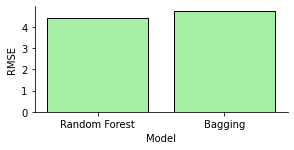

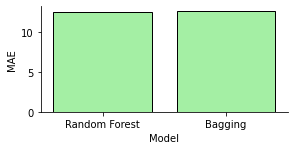

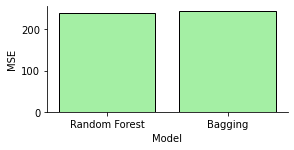

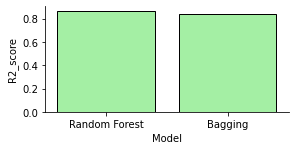

In [318]:
for i in modelDF.columns[modelDF.columns!='Model']:
    sns.factorplot(x= 'Model', y= i, data= modelDF, kind='bar',size=2, aspect=2,color='#98FB98',edgecolor='black',linewidth = 1)


<AxesSubplot:xlabel='interest_rate', ylabel='Count'>

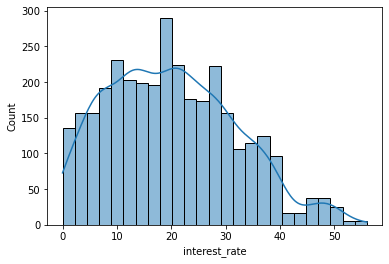

In [341]:
sns.histplot(data=y_test, kde=True)

<AxesSubplot:ylabel='Count'>

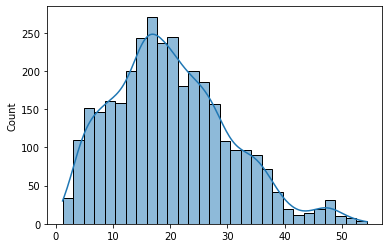

In [335]:
sns.histplot(data=TR_y_prediction,  kde=True)

<AxesSubplot:ylabel='Count'>

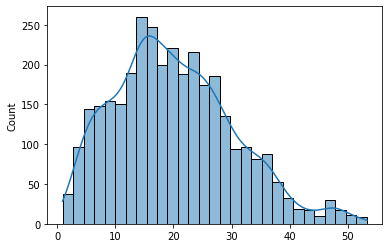

In [342]:
sns.histplot(data=BG_y_prediction,  kde=True)

<h1 style="font-size:1.2em;color:Red">Due to time limit and other activities I was able to perform analysis using the random combination of varibale, if sufficient time would have been given, I would have first understand the business processes and the variables of interest that are key factors in running the business. Secondly, most of the time I would like to devote in understanding the data and cleaning it. Then according to the business requirement, I would deploy models and repeat the processes. </h1>